In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import altair as alt
import pandas as pd

In [2]:
def opAmp(v1, v2, gain=1):
    return gain*(v1 - v2)

In [43]:
def voltageSource(freq=1, amplitude=1, phase=0):
    time = np.arange(0,4*np.pi,0.1)
    amp = amplitude * np.sin(freq*time+phase)
    return (time, amp)

In [44]:
def signalGenerator(time, amplitude, figsize=(6,4)):
    plt.figure(figsize=figsize)
    for t, a in zip(time, amplitude):
        plt.plot(t,a)
        plt.xlabel('Time')
        plt.ylabel('Amplitude = sin(time)')
        plt.grid(True, which='both')
        plt.axhline(y=0, color='k')
    return plt #plt.show()

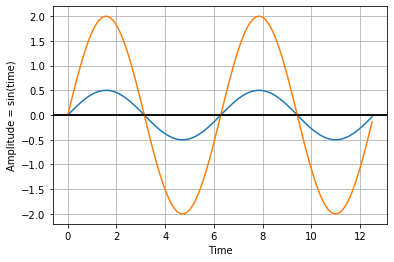

In [45]:
t2,a2 = voltageSource(amplitude=2)
t1,a1 = voltageSource(amplitude=0.5)
fig = signalGenerator([t1,t2],[a1,a2])
fig.show()

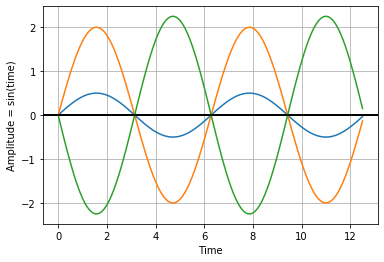

In [6]:
v_out = opAmp(a1,a2,gain=1.5)
fig = signalGenerator([t1,t1,t1],[a1,a2,v_out])
fig.show()

In [133]:
def plotData(time, amplitude):
    data = {}
    data['time'] = time
    prefix = 'v'
    for i, a in enumerate(amplitude):
        if i != len(amplitude)-1:
            data[prefix+str(i)] = a
        else:
            data['V_Out'] = a
            
    source = pd.DataFrame(data)
    source = source.melt('time', var_name='voltage_sources', value_name='v_out')
    # Create a selection that chooses the nearest point & selects based on x-value
    nearest = alt.selection(type='single', nearest=True, on='mouseover',
                            fields=['time'], empty='none')

    # The basic line
    line = alt.Chart(source).mark_line(interpolate='basis').encode(
        x='time:Q',
        y='v_out:Q',
        color='voltage_sources:N'
    )

    # Transparent selectors across the chart. This is what tells us
    # the x-value of the cursor
    selectors = alt.Chart(source).mark_point().encode(
        x='time:Q',
        opacity=alt.value(0),
    ).add_selection(
        nearest
    )

    # Draw points on the line, and highlight based on selection
    points = line.mark_point().encode(
        opacity=alt.condition(nearest, alt.value(1), alt.value(0))
    )

    # Draw text labels near the points, and highlight based on selection
    text = line.mark_text(align='left', dx=5, dy=-5).encode(
        text=alt.condition(nearest, 'v_out:Q', alt.value(' '))
    )

    # Draw a rule at the location of the selection
    rules = alt.Chart(source).mark_rule(color='gray').encode(
        x='time:Q',
    ).transform_filter(
        nearest
    )
    
    refLine = alt.Chart(source).mark_rule().encode(
    y='average(v_out)',
    color='voltage_sources',
#     size=alt.value(2)
)

    # Put the five layers into a chart and bind the data
    scope = alt.layer(
        refLine, line, selectors, points, rules, text
    ).properties(
        width=600, height=300
    )
    return scope

In [8]:
plotData(t1,[a1])

alt.LayerChart(...)

In [9]:
plotData(t1,[a1,a2,v_out])

alt.LayerChart(...)

In [71]:
t1,a1 = voltageSource(freq=1, amplitude=1)
t2,a2 = voltageSource(freq=2, amplitude=2)
t3,a3 = voltageSource(freq=4, amplitude=2.5)
t4,a4 = voltageSource(freq=10, amplitude=.5)
t5,a5 = voltageSource(freq=300, amplitude=0.25)


In [72]:
a6 = a1 + a2 + a3 - a4 + a5

In [81]:
a7 = (a3 - a2)*0.75
a8 = (a3 * a2)*0.25
a9 = (a3 + a2)*0.12

In [82]:
len(a1), len(a2), len(a3), len(a4)

(126, 126, 126, 126)

In [84]:
plotData(t1,[a8])

alt.LayerChart(...)

In [85]:
plotData(t1,[a1,a2,a3,a4,a5,a6,a7,a8])

alt.LayerChart(...)

In [33]:
plotData(v1[0],[v3[1]])

alt.LayerChart(...)

In [128]:
def pwm(duty_cycle=0.5, time_period=1, v_max=1, v_min=0):
    wave = []
    one_cycle_samples = 250
    samples =  one_cycle_samples
    total_samples = np.linspace(0.0,time_period,time_period * samples)
    for t in range(int(time_period)):
        for s in range(samples):
            if s < one_cycle_samples*duty_cycle:
                wave.append(v_max)
            else:
                wave.append(v_min)
    return (total_samples,wave)

<module 'matplotlib.pyplot' from '/home/l-8053/py3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

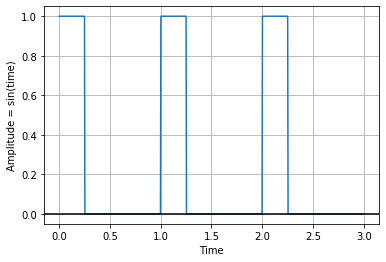

In [145]:
t,w = pwm(duty_cycle=.25,time_period=3,v_max=1, v_min=0)
signalGenerator([t],[w])

In [146]:
plotData(t,[w])

alt.LayerChart(...)